# **Import Stanford Dogs 120**

by Ding

This notebook provides a way to import the Stanford Dogs 120 dataset.

Download it from [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/).

In [1]:
!wget "vision.stanford.edu/aditya86/ImageNetDogs/images.tar"

--2021-05-19 07:31:42--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  18.7MB/s    in 44s     

2021-05-19 07:32:26 (17.3 MB/s) - ‘images.tar’ saved [793579520/793579520]



Untar it.

In [ ]:
!tar -xvf /content/images.tar
!ls

Preprocess it.

In [22]:
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
BASEPATH = "/content/Images/"

LABELS = set()

paths = []
    
for d in os.listdir(BASEPATH):
    LABELS.add(d)
    paths.append((BASEPATH+d, d))

In [11]:
# resizing and converting to RGB

def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [13]:
X = []
y = []

for path, label in paths:
    for image_path in os.listdir(path):
        image = load_and_preprocess_image(path+"/"+image_path)
        
        X.append(image)
        y.append(label)

In [18]:
encoder = LabelBinarizer()

X = np.array(X)
y = encoder.fit_transform(np.array(y))

print(y[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


(20580, 224, 224, 3)
(20580, 120)


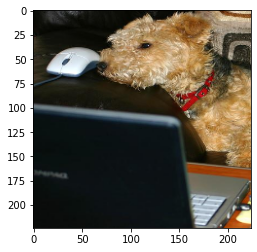

In [19]:
print(X.shape)
print(y.shape)
plt.imshow(X[0])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Done!